## Effect of Number and Depth of Hidden Units on Nonlinearity

This notebook looks at the effect of increasing the number of hidden layers and the number of hidden units in each layer in order to model non-linear data.

The code is adapted from [Simple end-to-end Tensorflow examples](http://bcomposes.com/2015/11/26/simple-end-to-end-tensorflow-examples/) blog post by Jason Baldridge. The ideas here are identical, except the implementation uses [Keras](https://keras.io/) instead of [Tensorflow](https://www.tensorflow.org/).

### Imports and setup

In [1]:
from __future__ import division, print_function
from sklearn.cross_validation import train_test_split
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.utils import np_utils

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using Theano backend.


In [2]:
def read_dataset(filename):
    Z = np.loadtxt(filename, delimiter=",")
    y = Z[:, 0]
    X = Z[:, 1:]
    return X, y

def plot_dataset(X, y):
    Xred = X[y==0]
    Xblue = X[y==1]
    plt.scatter(Xred[:, 0], Xred[:, 1], color='r', marker='o')
    plt.scatter(Xblue[:, 0], Xblue[:, 1], color='b', marker='o')
    plt.xlabel("X[0]")
    plt.ylabel("X[1]")
    plt.show()


### Linearly Separable Data

Our first dataset is linearly separable as seen in the scatter plot below.

(1334, 2) (1334,)


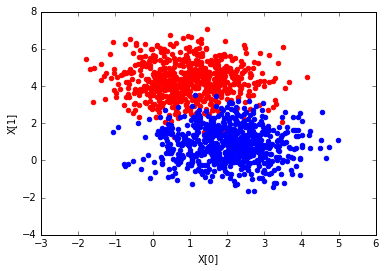

In [3]:
X, y = read_dataset("../data/linear.csv")
X = X[y != 2]
y = y[y != 2].astype("int")
print(X.shape, y.shape)
plot_dataset(X, y)

Our y values need to be in sparse one-hot encoding format, so we convert the labels to this format. We then split the dataset 70% for training and 30% for testing.

In [4]:
Y = np_utils.to_categorical(y, 2)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3, random_state=0)

Construct a model with an input layer which takes 2 inputs, and a softmax output layer. The softmax activation takes the scores from each output line and converts them to probabilities. There is no non-linear activation in this network. The equation is given by:

<img src="files/linear_eqn.png"/>

Training this model for 50 epochs yields accuracy of 82.8% on the test set.

In [5]:
model = Sequential()
model.add(Dense(2, input_shape=(2,)))
model.add(Activation("softmax"))

model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
model.fit(Xtrain, Ytrain, batch_size=32, nb_epoch=50, validation_data=(Xtest, Ytest))

Train on 933 samples, validate on 401 samples
Epoch 1/50
933/933 [==============================] - 0s - loss: 0.5953 - acc: 0.7085 - val_loss: 0.3681 - val_acc: 0.8579
Epoch 2/50
933/933 [==============================] - 0s - loss: 0.3103 - acc: 0.9110 - val_loss: 0.3085 - val_acc: 0.8928
Epoch 3/50
933/933 [==============================] - 0s - loss: 0.2769 - acc: 0.9153 - val_loss: 0.2925 - val_acc: 0.8903
Epoch 4/50
933/933 [==============================] - 0s - loss: 0.2622 - acc: 0.9175 - val_loss: 0.2817 - val_acc: 0.8953
Epoch 5/50
933/933 [==============================] - 0s - loss: 0.2517 - acc: 0.9218 - val_loss: 0.2727 - val_acc: 0.8978
Epoch 6/50
933/933 [==============================] - 0s - loss: 0.2432 - acc: 0.9218 - val_loss: 0.2651 - val_acc: 0.8978
Epoch 7/50
933/933 [==============================] - 0s - loss: 0.2360 - acc: 0.9228 - val_loss: 0.2588 - val_acc: 0.8978
Epoch 8/50
933/933 [==============================] - 0s - loss: 0.2296 - acc: 0.9250 - val_l

score: 0.182, accuracy: 0.925


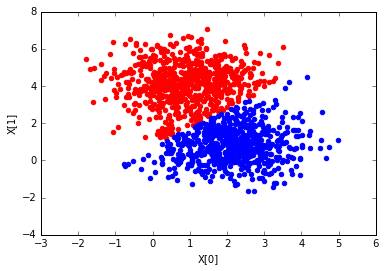

In [6]:
score = model.evaluate(Xtest, Ytest, verbose=0)
print("score: %.3f, accuracy: %.3f" % (score[0], score[1]))

Y_ = model.predict(X)
y_ = np_utils.categorical_probas_to_classes(Y_)
plot_dataset(X, y_)

### Linearly non-separable data \#1

The data below is the moons dataset. The two clusters cannot be separated by a straight line.

(2000, 2) (2000,)


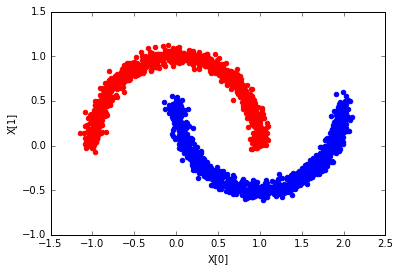

In [7]:
X, y = read_dataset("../data/moons.csv")
y = y.astype("int")
print(X.shape, y.shape)
plot_dataset(X, y)

In [8]:
Y = np_utils.to_categorical(y, 2)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3, random_state=0)

A network with the same configuration as above produces a accuracy of 85.67% on the test set, as opposed to 92.7% on the linear dataset.

Let us add a hidden layer of 50 hidden units and a Rectified Linear Unit (ReLu) activation to induce some non-linearity in the model. This gives us an accuracy of 89.3%.

In [9]:
model = Sequential()
model.add(Dense(50, input_shape=(2,)))
model.add(Activation("relu"))
model.add(Dense(2))
model.add(Activation("softmax"))

model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
model.fit(Xtrain, Ytrain, batch_size=32, nb_epoch=50, validation_data=(Xtest, Ytest))

Train on 1400 samples, validate on 600 samples
Epoch 1/50
1400/1400 [==============================] - 0s - loss: 0.6720 - acc: 0.5943 - val_loss: 0.6208 - val_acc: 0.7867
Epoch 2/50
1400/1400 [==============================] - 0s - loss: 0.5794 - acc: 0.8186 - val_loss: 0.5476 - val_acc: 0.8050
Epoch 3/50
1400/1400 [==============================] - 0s - loss: 0.5148 - acc: 0.8350 - val_loss: 0.4948 - val_acc: 0.8083
Epoch 4/50
1400/1400 [==============================] - 0s - loss: 0.4668 - acc: 0.8414 - val_loss: 0.4550 - val_acc: 0.8117
Epoch 5/50
1400/1400 [==============================] - 0s - loss: 0.4299 - acc: 0.8443 - val_loss: 0.4242 - val_acc: 0.8117
Epoch 6/50
1400/1400 [==============================] - 0s - loss: 0.4010 - acc: 0.8536 - val_loss: 0.4001 - val_acc: 0.8167
Epoch 7/50
1400/1400 [==============================] - 0s - loss: 0.3780 - acc: 0.8536 - val_loss: 0.3806 - val_acc: 0.8250
Epoch 8/50
1400/1400 [==============================] - 0s - loss: 0.3593 - ac

score: 0.238, accuracy: 0.892


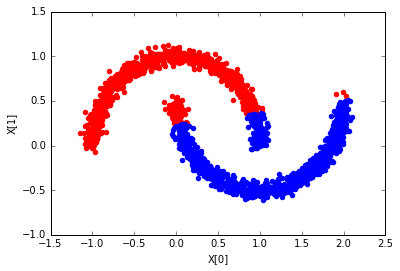

In [10]:
score = model.evaluate(Xtest, Ytest, verbose=0)
print("score: %.3f, accuracy: %.3f" % (score[0], score[1]))

Y_ = model.predict(X)
y_ = np_utils.categorical_probas_to_classes(Y_)
plot_dataset(X, y_)

Lets add another layer. Layers produce non-linearity. We add another hidden layer with 100 units, also with a ReLu activation unit. This brings up our accuracy to 92%. The separation is still mostly linear, with just the beginnings of non-linearity.

In [11]:
model = Sequential()
model.add(Dense(50, input_shape=(2,)))
model.add(Activation("relu"))
model.add(Dense(100))
model.add(Activation("relu"))
model.add(Dense(2))
model.add(Activation("softmax"))

model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
model.fit(Xtrain, Ytrain, batch_size=32, nb_epoch=50, validation_data=(Xtest, Ytest))

Train on 1400 samples, validate on 600 samples
Epoch 1/50
1400/1400 [==============================] - 0s - loss: 0.6461 - acc: 0.7443 - val_loss: 0.6040 - val_acc: 0.7600
Epoch 2/50
1400/1400 [==============================] - 0s - loss: 0.5660 - acc: 0.7943 - val_loss: 0.5371 - val_acc: 0.7867
Epoch 3/50
1400/1400 [==============================] - 0s - loss: 0.5031 - acc: 0.8086 - val_loss: 0.4838 - val_acc: 0.7917
Epoch 4/50
1400/1400 [==============================] - 0s - loss: 0.4529 - acc: 0.8200 - val_loss: 0.4414 - val_acc: 0.7967
Epoch 5/50
1400/1400 [==============================] - 0s - loss: 0.4137 - acc: 0.8286 - val_loss: 0.4099 - val_acc: 0.8033
Epoch 6/50
1400/1400 [==============================] - 0s - loss: 0.3844 - acc: 0.8321 - val_loss: 0.3867 - val_acc: 0.8067
Epoch 7/50
1400/1400 [==============================] - 0s - loss: 0.3621 - acc: 0.8407 - val_loss: 0.3687 - val_acc: 0.8167
Epoch 8/50
1400/1400 [==============================] - 0s - loss: 0.3447 - ac

score: 0.197, accuracy: 0.910


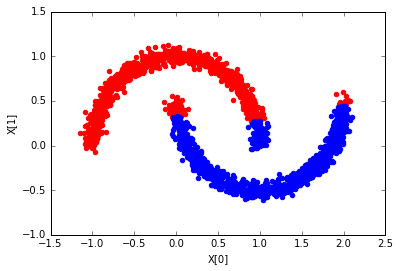

In [12]:
score = model.evaluate(Xtest, Ytest, verbose=0)
print("score: %.3f, accuracy: %.3f" % (score[0], score[1]))

Y_ = model.predict(X)
y_ = np_utils.categorical_probas_to_classes(Y_)
plot_dataset(X, y_)

### Linearly non-separable data \#2

This is the saturn dataset. The data is definitely not linearly separable unless one applies a radial function to project onto a sphere and cut horizontally across the sphere. We will not do this, since our objective is to investigate the effect of hidden layers and hidden units.

(2000, 2) (2000,)


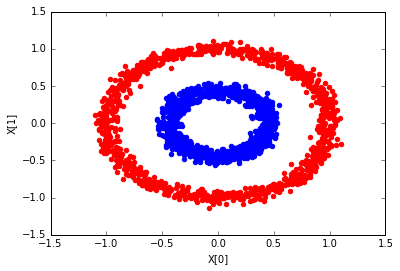

In [13]:
X, y = read_dataset("../data/saturn.csv")
y = y.astype("int")
print(X.shape, y.shape)
plot_dataset(X, y)

Previous network (producing 90.5% accuracy on test data for the moon data) produces 90.3% accuracy on the Saturn data. You can see the boundary getting non-linear.

In [14]:
model = Sequential()
model.add(Dense(50, input_shape=(2,)))
model.add(Activation("relu"))
model.add(Dense(100))
model.add(Activation("relu"))
model.add(Dense(2))
model.add(Activation("softmax"))

model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
model.fit(Xtrain, Ytrain, batch_size=32, nb_epoch=50, validation_data=(Xtest, Ytest))

Train on 1400 samples, validate on 600 samples
Epoch 1/50
1400/1400 [==============================] - 0s - loss: 0.6458 - acc: 0.6900 - val_loss: 0.6154 - val_acc: 0.7217
Epoch 2/50
1400/1400 [==============================] - 0s - loss: 0.5856 - acc: 0.7629 - val_loss: 0.5632 - val_acc: 0.7500
Epoch 3/50
1400/1400 [==============================] - 0s - loss: 0.5337 - acc: 0.7879 - val_loss: 0.5164 - val_acc: 0.7733
Epoch 4/50
1400/1400 [==============================] - 0s - loss: 0.4872 - acc: 0.8079 - val_loss: 0.4735 - val_acc: 0.7917
Epoch 5/50
1400/1400 [==============================] - 0s - loss: 0.4453 - acc: 0.8164 - val_loss: 0.4367 - val_acc: 0.8017
Epoch 6/50
1400/1400 [==============================] - 0s - loss: 0.4101 - acc: 0.8307 - val_loss: 0.4062 - val_acc: 0.8033
Epoch 7/50
1400/1400 [==============================] - 0s - loss: 0.3805 - acc: 0.8414 - val_loss: 0.3809 - val_acc: 0.8117
Epoch 8/50
1400/1400 [==============================] - 0s - loss: 0.3560 - ac

score: 0.203, accuracy: 0.907


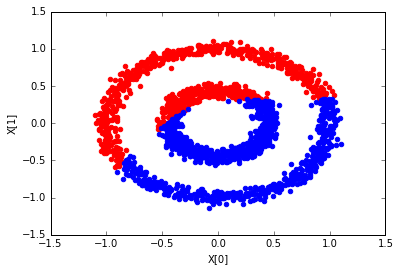

In [15]:
score = model.evaluate(Xtest, Ytest, verbose=0)
print("score: %.3f, accuracy: %.3f" % (score[0], score[1]))

Y_ = model.predict(X)
y_ = np_utils.categorical_probas_to_classes(Y_)
plot_dataset(X, y_)

Lets increase the number of hidden units from 1 to 2. The number of hidden units in each layer is also much larger. We have also added Rectified Linear Unit activations and Dropouts on each layer. Using this, our accuracy goes up to 98.8%. The separation boundary is now definitely non-linear.

In [16]:
model = Sequential()

model.add(Dense(1024, input_shape=(2,)))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dense(2))
model.add(Activation("softmax"))

model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
model.fit(Xtrain, Ytrain, batch_size=32, nb_epoch=50, validation_data=(Xtest, Ytest))

Train on 1400 samples, validate on 600 samples
Epoch 1/50
1400/1400 [==============================] - 0s - loss: 0.6546 - acc: 0.8279 - val_loss: 0.6185 - val_acc: 0.8150
Epoch 2/50
1400/1400 [==============================] - 0s - loss: 0.5990 - acc: 0.8386 - val_loss: 0.5622 - val_acc: 0.8100
Epoch 3/50
1400/1400 [==============================] - 0s - loss: 0.5424 - acc: 0.8429 - val_loss: 0.5063 - val_acc: 0.8100
Epoch 4/50
1400/1400 [==============================] - 0s - loss: 0.4833 - acc: 0.8421 - val_loss: 0.4525 - val_acc: 0.8133
Epoch 5/50
1400/1400 [==============================] - 0s - loss: 0.4311 - acc: 0.8450 - val_loss: 0.4068 - val_acc: 0.8167
Epoch 6/50
1400/1400 [==============================] - 0s - loss: 0.3867 - acc: 0.8514 - val_loss: 0.3715 - val_acc: 0.8250
Epoch 7/50
1400/1400 [==============================] - 0s - loss: 0.3519 - acc: 0.8571 - val_loss: 0.3451 - val_acc: 0.8300
Epoch 8/50
1400/1400 [==============================] - 0s - loss: 0.3244 - ac

score: 0.075, accuracy: 0.978


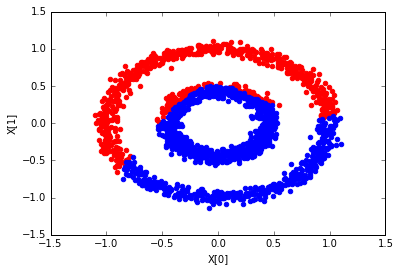

In [17]:
score = model.evaluate(Xtest, Ytest, verbose=0)
print("score: %.3f, accuracy: %.3f" % (score[0], score[1]))

Y_ = model.predict(X)
y_ = np_utils.categorical_probas_to_classes(Y_)
plot_dataset(X, y_)